# Árvore de decisão - parte 2 (Gerando árvores de classificação)¶

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [387]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Módulos do scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [388]:
# Carregando a base de dados
df = pd.read_csv('df_encoded.csv')
print(df.shape)
df.tail()

(16650, 34)


,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
16645,16645,0,0,1,0,54.109589,9.884932,1,0,0,...,False,False,False,False,False,True,False,False,False,False
16646,16646,0,0,1,0,43.389041,7.380822,1,1,1,...,True,False,False,False,False,True,False,False,False,False
16647,16647,1,1,1,0,30.005479,9.800000,1,1,0,...,True,False,False,False,False,True,False,False,False,False
16648,16648,1,1,1,0,30.005479,9.800000,1,1,0,...,True,False,False,False,False,True,False,False,False,False
16649,16649,0,0,1,0,33.936986,3.630137,1,0,1,...,True,False,False,False,False,True,False,False,False,False


In [389]:
# A coluna 'Unnamed: 0' é o índice que foi salvo no arquivo base
# isso pode ser evitado utilizando 'index=False' no salvamento do arquivo
# arquivo.to_csv('arquivo.csv', index=False)

# Fazendo a remoção de tal coluna para deixar o dataframe correto
df = df.drop('Unnamed: 0', axis=1)

In [390]:
# Note pelo .shape que o número de colunas agora é 33,
# uma coluna menor devido a remoção de 'Unnamed: 0'
print(df.shape)
df.head()

(16650, 33)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,True,False,False,False,False,True,False,False,False,False
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False


In [391]:
# O dataFrame não possui dados ausentes

# Verificando
df.isna().sum()

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [392]:
# Informações do dataframe (não há variáveis str - Pandas object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [393]:
# Definindo a variável alvo "mau" (target) a partir de "df"

y = df['mau']
print(y.shape)
y

(16650,)


0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [394]:
# Definindo o conjunto de dados para as variáveis explicativas

x = df.drop('mau', axis=1)
print(x.shape)
x.head(3)

(16650, 32)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,False,False,True,False,False,True,False,False,False,False


In [395]:
# Separando em grupos de dados para treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=100)

In [396]:
# Avaliando a dimensão dos grupos de treino e teste

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11655, 32)
(11655,)
(4995, 32)
(4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [398]:
# 1 - Criando a árvore de classificação
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [399]:
# 2 - Treinando o modelo com os dados de treinamento (via fit)
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

Text(0.5, 1.0, 'Árvore de classificação')

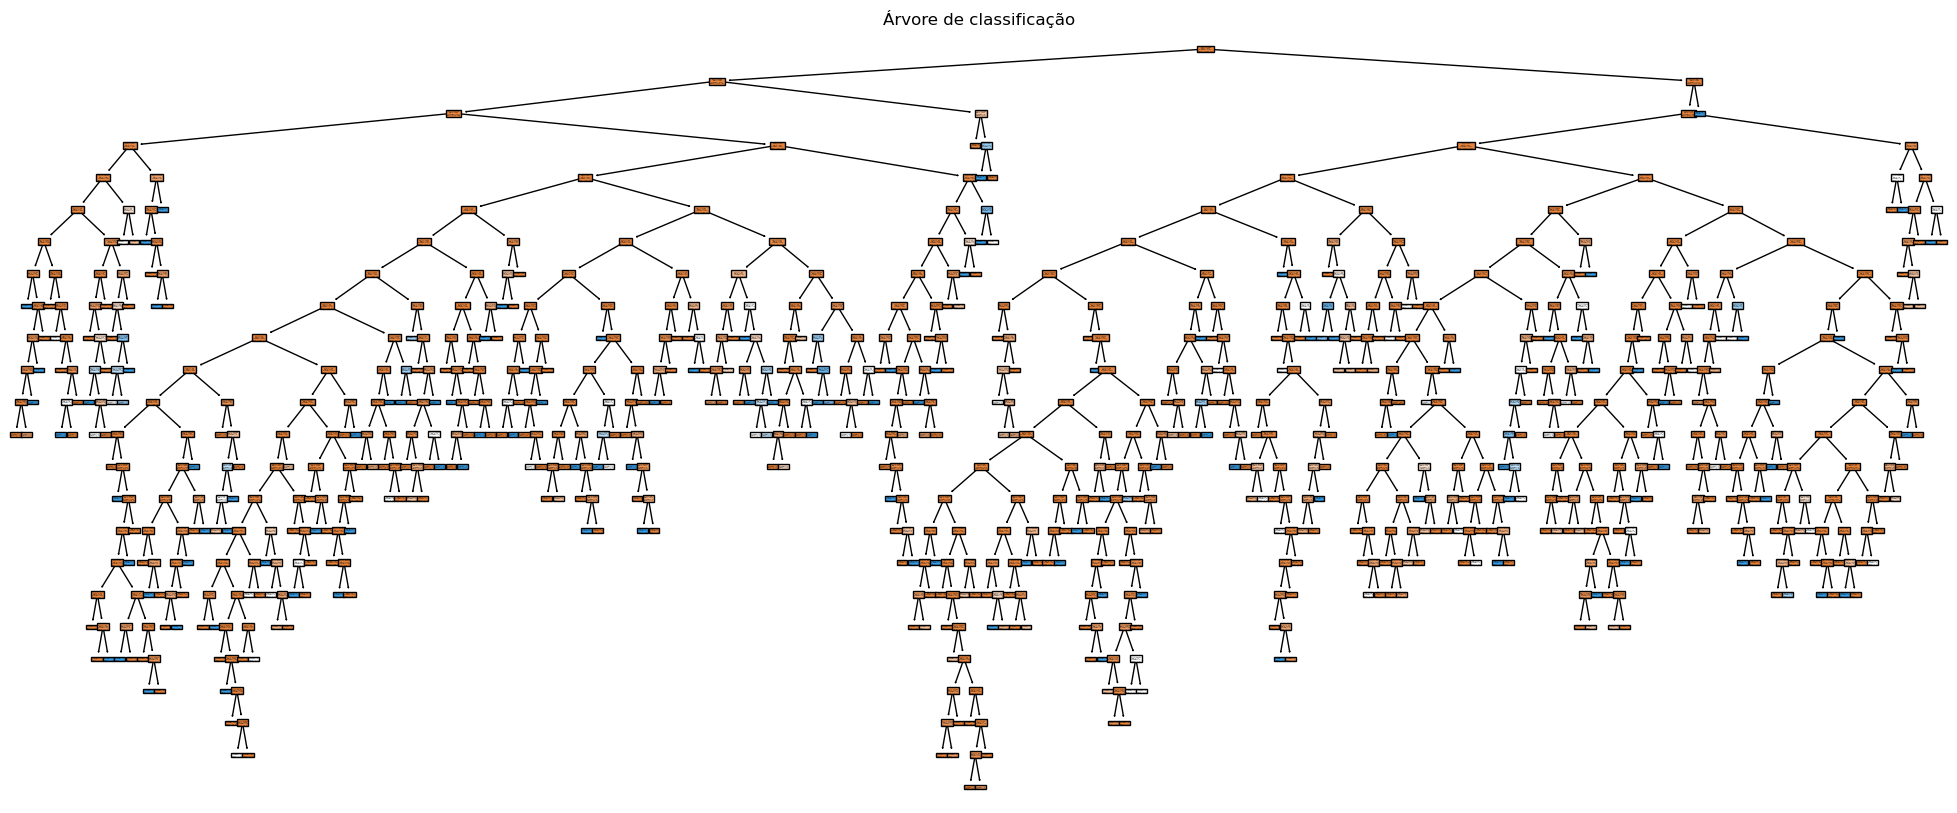

In [400]:
# 3 - Gerando graficamente a árvore de classificação
plt.figure(figsize=(25, 10))
plot_tree(
    clf,
    filled=True,
)

# Adicionando um título
plt.title('Árvore de classificação')

In [401]:
# 4 - Definindo a 'predição' com base nos dados de treino

predict = clf.predict(x_train)
predict

array([False, False, False, ..., False, False, False])

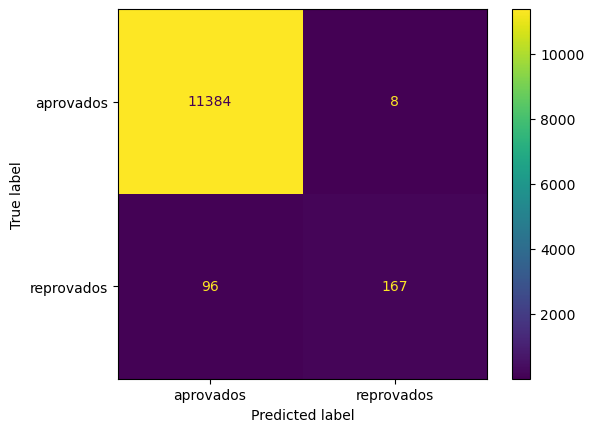

In [402]:
# Definindo a matriz de confusão
cm = confusion_matrix(y_train, predict)
matrix_train = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['aprovados', 'reprovados'])
matrix_train.plot()

In [403]:
# Verificando os valores da variável target
y_train.value_counts()

mau
False    11392
True       263
Name: count, dtype: int64

In [404]:
# 5 - Definindo a acurácia da base de treinamento

# Manualmente
acerto = 11384 + 167
total = acerto + 96 + 8

acuracia = acerto / total
print('A acurácia é de {}%'.format(round(acuracia*100, 2)))

A acurácia é de 99.11%


In [405]:
# Diretamente pelo scikit-learn
accuracy_score(y_train, predict) * 100

99.1076791076791

Como pode-se notar a acurácia do modelo em relação a base de dados de treinamento está bem alta, isso pode indicar um possível `overfitting`.

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [408]:
# 1 - Aplicando para a base de teste

# Predição 
predict_test = clf.predict(x_test)
predict_test

array([False, False, False, ..., False, False, False])

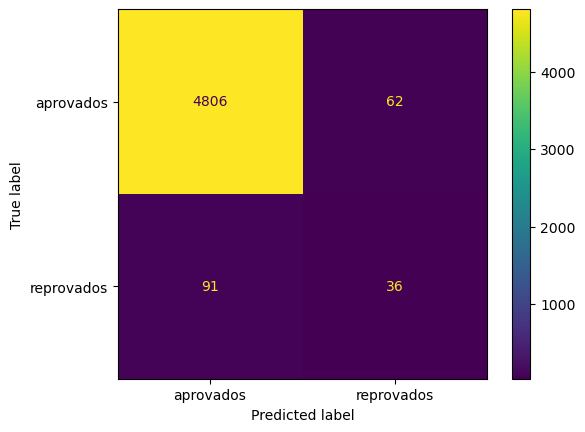

In [409]:
# 2 - Gerando a matriz de confusão da base de dados de teste

cm = confusion_matrix(y_test, predict_test)
matrix_test = ConfusionMatrixDisplay(cm, display_labels=['aprovados', 'reprovados'])
matrix_test.plot()

In [410]:
# 3 - Determinando a acurácia para o teste

acuracia_test = accuracy_score(y_test, predict_test)
acuracia_test

0.9693693693693693

In [411]:
# Comparando a acurácia do teste com a do treino

acuracia_train = accuracy_score(y_train, predict)

print('--> A acurácia do modelo de treinamento é de {}%'.format(round(acuracia_train*100, 2)))
print('--> A acurácia do modelo de teste é de {}%'.format(round(acuracia_test*100, 2)))

--> A acurácia do modelo de treinamento é de 99.11%
--> A acurácia do modelo de teste é de 96.94%


>**O modelo foi capaz de prever novos resultados, os resultados do conjunto de teste, com uma acurácia bem alta.**

In [413]:
# 4 - Definindo uma árvore de classifica com profundidade e 
# numéro de amostras (samples) por folha

# Definindo a árvore
clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [414]:
# Treinando 
clf2 = clf2.fit(x_train, y_train)
clf2

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

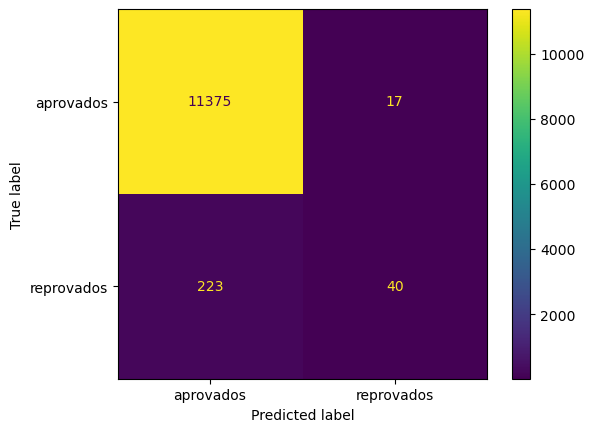

In [415]:
# Definindo a matriz de confusão (classificação)
predict = clf2.predict(x_train)
cm = confusion_matrix(y_train, predict)
matrix = ConfusionMatrixDisplay(cm, display_labels=['aprovados', 'reprovados'])
matrix.plot()

Text(0.5, 1.0, 'Árvore de classificação')

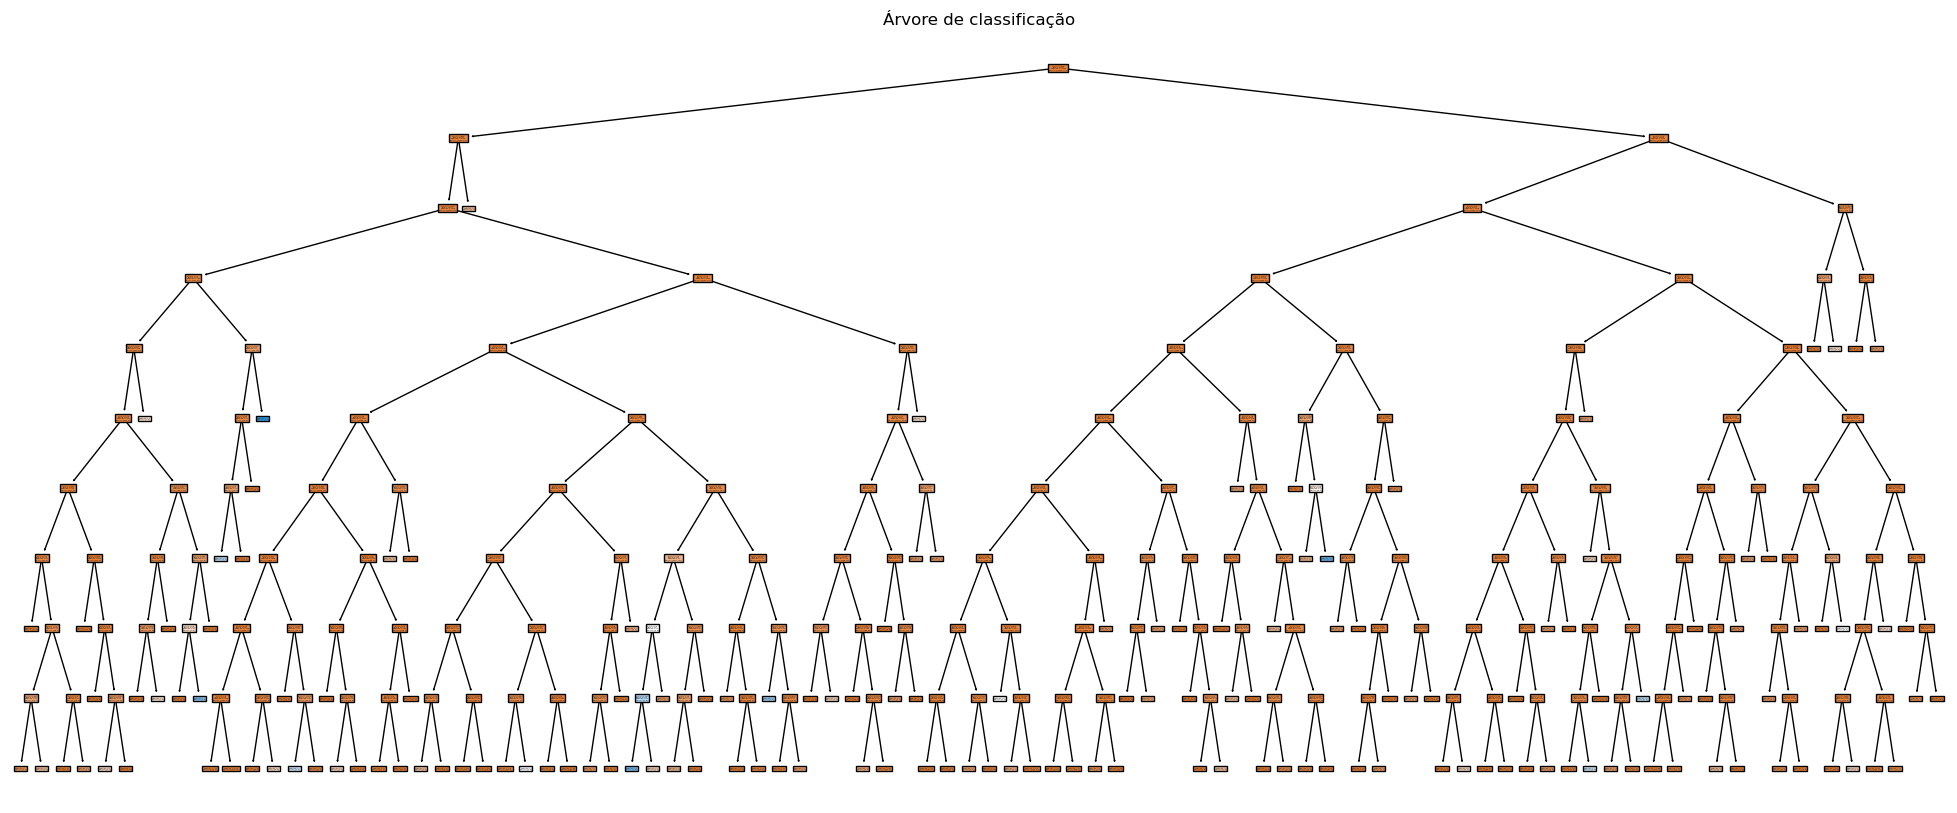

In [416]:
# árvore
plt.figure(figsize=(25,10))
plot_tree(
    clf2,
    filled=True,
    
)
plt.title('Árvore de classificação')

In [417]:
# Proporção de "mau"
# "mau" seria o conujunto dos reprovados, logo 40 proponentes

prop = (40 / y_train.shape[0])*100
print('A proporção de proponentes classificada como "mau" foi de {}%.'.format(round(prop,2)))

A proporção de proponentes classificada como "mau" foi de 0.34%.


In [418]:
# 5 - Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
y.loc[y==True] = False

C:\Users\theta\AppData\Local\Temp\ipykernel_19884\588282123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y==True] = False


In [419]:
y.value_counts()

mau
False    16650
Name: count, dtype: int64

In [420]:
# Gerando a árvore agora que todos os contratos são 'bons'
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [421]:
# Treinando
clf = clf.fit(x, y)
clf

DecisionTreeClassifier(random_state=100)

In [422]:
predict = clf.predict(x)

# A acurácia
accuracy_score(y, predict)

1.0

**Uma vez que todos os proponentes sejam considerados como bons, não há decisão a ser tomada, não há ramificações. Desta forma, a acurácia do modelo será de 100%, mas não devido ao fato de ser bom em se ajustar e prever novos resultados, mas por haver apenas uma saída lógica que é "bom", ou seja, todos os clientes são/estão naturalmente aprovados.**

Text(0.5, 1.0, 'Árvore de classificação')

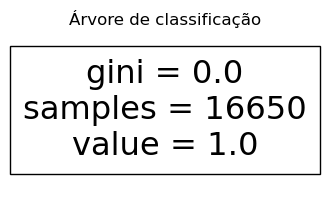

In [424]:
# O plot da árvore de decisão teria a forma

plt.figure(figsize=(4,2))
plot_tree(
    clf,
    filled=True
)
plt.title('Árvore de classificação')

C:\Users\theta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


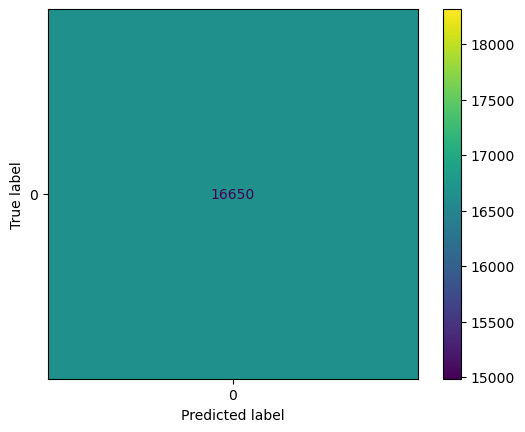

In [425]:
# E a matriz de confusão também teria apenas um valor
# ou seja, perde significado
cm = confusion_matrix(y, predict)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot()